#### Questions to Answer:

1. What are the predictors of maximum Salary?

2. How effectively can we predict how easy it is to apply for a job?

3. How effectively can we predict company success?


#### Loading libraries

In [1]:
# import libraries(pandas& numpy)
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

# import visualization libraries
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.express as px

import pandas_bokeh

print("Pandas-Bokeh Version : {}".format(pandas_bokeh.__version__))

pandas_bokeh.output_notebook()

# import machine learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier


Pandas-Bokeh Version : 0.5.5


Loading BokehJS ...

#### Loading dataset

In [2]:
# load data as dataframe 'd'
d=pd.read_csv('de processed.csv')


### Data Exploration


- Checking the first five rows of data

In [3]:
d.head()

Unnamed: 0                  Sector                       Competitors  \
0           0       Business Services               WCI Consulting, PwC   
1           1  Information Technology                               NaN   
2           2  Information Technology                               NaN   
3           3                 Finance                               NaN   
4           4               Insurance  Travelers, Chubb, Crum & Forster   

                     Revenue  Easy Apply  \
0    $10 - $25 million (USD)       False   
1    $25 - $50 million (USD)       False   
2     $5 - $10 million (USD)       False   
3                          0       False   
4  $100 - $500 million (USD)        True   

                                Industry  \
0                             Consulting   
1                            IT Services   
2                            IT Services   
3  Investment Banking & Asset Management   
4                     Insurance Carriers   

                                           Job Title  \
0                                      Data Engineer   
1  Senior Data Engineer (Healthcare Domain experi...   
2                                     Data Engineers   
3                      Client Trade Support Engineer   
4                                      Data Engineer   

                                     Job Description  Founded  \
0  Company DescriptionSagence is a management adv...     2009   
1  Key Responsibilities- Architect, build, and ma...     1998   
2  OverviewJob descriptionPosition Overview:Seeki...     2003   
3  About the PositionThis position will support J...     2000   
4  Data EngineerJob DetailsLevelExperiencedJob Lo...     1914   

       Headquarters  Type of ownership                   Size  Rating  \
0       Chicago, IL  Company - Private      1 to 50 employees     4.5   
1  Jacksonville, FL  Company - Private    51 to 200 employees     3.4   
2       Trenton, NJ  Company - Private    51 to 200 employees     5.0   
3      New York, NY  Company - Private  501 to 1000 employees     4.8   
4      New York, NY  Company - Private   201 to 500 employees     3.7   

       Location  Min Salary  Max Salary                  company  
0  New York, NY        80.0       150.0                  Sagence  
1  New York, NY        80.0       150.0   Enterprise Integration  
2  New York, NY        80.0       150.0     Maestro Technologies  
3  New York, NY        80.0       150.0              Jane Street  
4  New York, NY        80.0       150.0  GNY Insurance Companies

- ##### Checking the columns within the dataset

In [4]:
d.columns

Index(['Unnamed: 0', 'Sector', 'Competitors', 'Revenue', 'Easy Apply',
       'Industry', 'Job Title', 'Job Description', 'Founded', 'Headquarters',
       'Type of ownership', 'Size', 'Rating', 'Location', 'Min Salary',
       'Max Salary', 'company'],
      dtype='object')

- ##### Checking the datatypes of all columns

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2528 non-null   int64  
 1   Sector             2153 non-null   object 
 2   Competitors        779 non-null    object 
 3   Revenue            2528 non-null   object 
 4   Easy Apply         2528 non-null   bool   
 5   Industry           2150 non-null   object 
 6   Job Title          2528 non-null   object 
 7   Job Description    2528 non-null   object 
 8   Founded            2528 non-null   int64  
 9   Headquarters       2404 non-null   object 
 10  Type of ownership  2528 non-null   object 
 11  Size               2409 non-null   object 
 12  Rating             2528 non-null   float64
 13  Location           2528 non-null   object 
 14  Min Salary         2528 non-null   float64
 15  Max Salary         2528 non-null   float64
 16  company            2528 

#### More Specific Questions:
- What are the predictors of maximum Salary?
- How effectively can we predict how easy it is to apply for a job?
- How effectively can we predict company revenue?



### Data Manipulation

- ##### Renaming columns

In [6]:
# dropping column Unnamed: 0
d=d.drop(columns=["Unnamed: 0"])

In [7]:
"""Renaming([Revenue:Revenue(USD Millions)],
         [Min Salary:Min Salary(USD 1000s)],
         [Max Salary:Max Salary(USD 1000s)])
"""

d.columns=['Sector', 'Competitors', 'Revenue(USD Millions)', 'Easy Apply',
       'Industry', 'Job Title', 'Job Description', 'Founded', 'Headquarters',
       'Type of ownership', 'Size', 'Rating', 'Location', 'Min Salary(USD 1000s)',
       'Max Salary(USD 1000s)', 'company']

In [8]:
# Ensuring renaming of columns worked
d.columns

Index(['Sector', 'Competitors', 'Revenue(USD Millions)', 'Easy Apply',
       'Industry', 'Job Title', 'Job Description', 'Founded', 'Headquarters',
       'Type of ownership', 'Size', 'Rating', 'Location',
       'Min Salary(USD 1000s)', 'Max Salary(USD 1000s)', 'company'],
      dtype='object')

 ### Data cleaning

In [9]:
#Replace -1.0 values with 0 
d["Rating"].replace(-1,0, inplace=True)

In [10]:
#Checking if Sector can be categorical based on unique values

d[["Sector"]].nunique()

Sector    24
dtype: int64

In [11]:
# change these values to category
d[["Type of ownership", "Sector", "Size", "Easy Apply"]]=d[["Type of ownership", "Sector","Size","Easy Apply"]].replace("-1","NA").astype('category')

In [12]:
#ensure change has taken effect
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Sector                 2153 non-null   category
 1   Competitors            779 non-null    object  
 2   Revenue(USD Millions)  2528 non-null   object  
 3   Easy Apply             2528 non-null   category
 4   Industry               2150 non-null   object  
 5   Job Title              2528 non-null   object  
 6   Job Description        2528 non-null   object  
 7   Founded                2528 non-null   int64   
 8   Headquarters           2404 non-null   object  
 9   Type of ownership      2528 non-null   category
 10  Size                   2409 non-null   category
 11  Rating                 2528 non-null   float64 
 12  Location               2528 non-null   object  
 13  Min Salary(USD 1000s)  2528 non-null   float64 
 14  Max Salary(USD 1000s)  2528 non-null   f

In [13]:
#Check if Rating can be categorical based on unique values
d[["Rating"]].nunique()

Rating    37
dtype: int64

In [14]:
#Check if Min Salary can be categorical based on unique values

d["Min Salary(USD 1000s)"].nunique()

60

In [15]:
# formatting of Revenue column
d["Revenue(USD Millions)"]=d["Revenue(USD Millions)"].str.replace("$1 - $5 million (USD)","1-5", regex=False).str.replace("$5 - $10 million (USD)","5-10", regex=False).str.replace("$10 - $25 million (USD)","10-25",regex=False).str.replace("$25 - $50 million (USD)","25-50" ,regex=False).str.replace("Less than $1 million (USD)","1" ,regex=False).str.replace("$50 - $100 million (USD)","50-100",regex=False).str.replace("$50 - $100 million (USD)","50-100",regex=False).str.replace("$100 - $500 million (USD)","100-500",regex=False).str.replace("$500 million - $1 billion (USD)","500-1000",regex=False).str.replace("$1 - $2 billion (USD)","1000-2000",regex=False).str.replace("$2 - $5 billion (USD)","2000-5000",regex=False).str.replace("$5 - $10 billion (USD)","5000-10000",regex=False).str.replace("$10+ billion (USD)", "10000", regex=False).astype("category")

In [16]:

# double checking changes
d["Revenue(USD Millions)"].value_counts()

0             833
10000         393
100-500       274
50-100        150
2000-5000     135
10-25         131
25-50         120
1-5           104
5000-10000     98
1              82
1000-2000      77
500-1000       68
5-10           63
Name: Revenue(USD Millions), dtype: int64

In [17]:
d[["Revenue(USD Millions)"]].value_counts()

Revenue(USD Millions)
0                        833
10000                    393
100-500                  274
50-100                   150
2000-5000                135
10-25                    131
25-50                    120
1-5                      104
5000-10000                98
1                         82
1000-2000                 77
500-1000                  68
5-10                      63
dtype: int64

In [18]:
# changing Revenue to category
d["Revenue(USD Millions)"].astype('category')

0         10-25
1         25-50
2          5-10
3             0
4       100-500
         ...   
2523        1-5
2524       5-10
2525    100-500
2526          0
2527      25-50
Name: Revenue(USD Millions), Length: 2528, dtype: category
Categories (13, object): ['0', '1', '1-5', '10-25', ..., '5-10', '50-100', '500-1000', '5000-10000']

### EDA(Exploratory Data Analysis)

### Checking for outliers

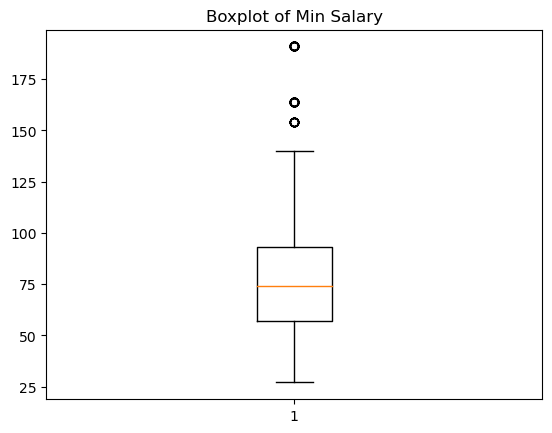

In [19]:
# Use matplotlib boxplot to identify outliers in minimum Salary
plt.boxplot(d["Min Salary(USD 1000s)"])
plt.title("Boxplot of Min Salary")
plt.show()

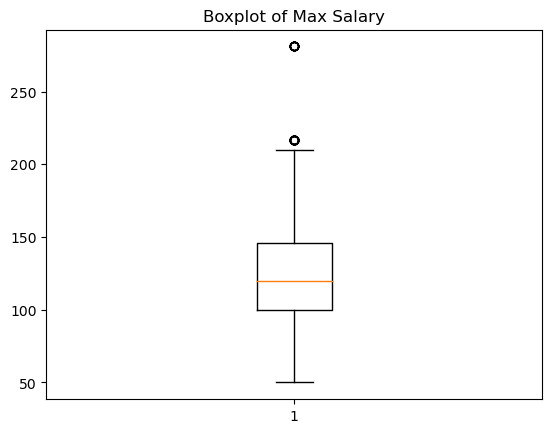

In [20]:
# Use matplotlib boxplot to identify outliers in minimum Salary

plt.boxplot(d["Max Salary(USD 1000s)"])
plt.title("Boxplot of Max Salary")
plt.show()

- #### Checking for correlation between Max and Min Salaries

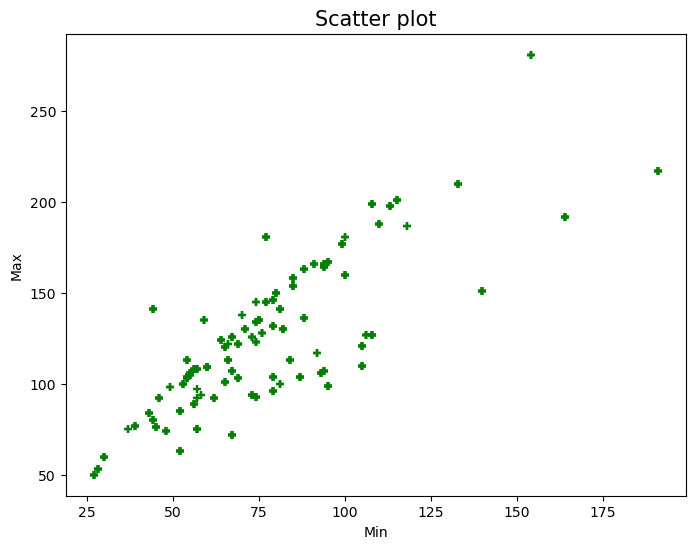

In [21]:
fig,ax= plt.subplots(figsize=(8,6))
ax.scatter(d['Min Salary(USD 1000s)'],
           d['Max Salary(USD 1000s)'],
           color='green',
           marker= '+')
ax.set_xlabel('Min')
ax.set_ylabel('Max')
ax.set_title('Scatter plot',fontsize= 15)
plt.show()

- There seems to be some correlation between the two variables

In [22]:
# Creating a dataframe from Revenue, Max & Min Salary
Max = d.groupby("Revenue(USD Millions)")["Max Salary(USD 1000s)", "Min Salary(USD 1000s)"].mean()


C:\Users\ACER\AppData\Local\Temp\ipykernel_19220\3657583001.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Max = d.groupby("Revenue(USD Millions)")["Max Salary(USD 1000s)", "Min Salary(USD 1000s)"].mean()


In [23]:
# checking changes
type(Max)

pandas.core.frame.DataFrame

In [24]:
# print Max
Max

Max Salary(USD 1000s)  Min Salary(USD 1000s)
Revenue(USD Millions)                                              
0                                 126.027611              78.675870
1                                 118.865854              75.000000
1-5                               123.769231              76.557692
10-25                             127.961832              80.076336
100-500                           122.189781              76.343066
1000-2000                         119.116883              77.207792
10000                             124.030534              76.127226
2000-5000                         126.466667              80.644444
25-50                             124.758333              74.916667
5-10                              125.476190              75.841270
50-100                            126.066667              78.420000
500-1000                          119.308824              73.632353
5000-10000                        120.051020              69.448980

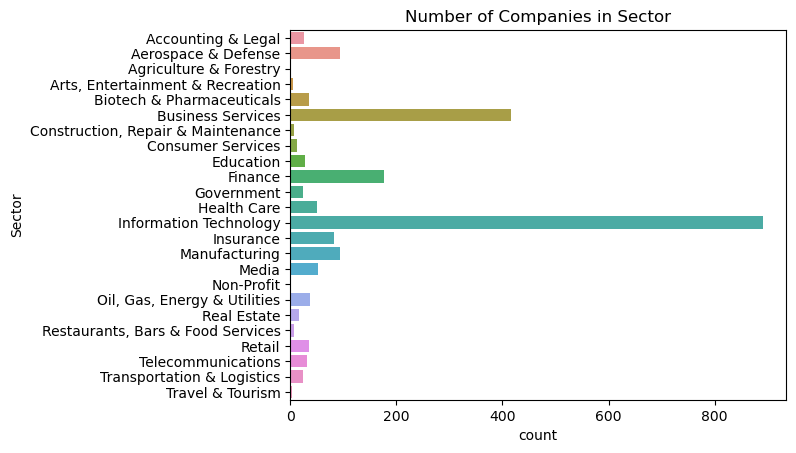

In [25]:
# checking counts of Companies in each Sector
sns.countplot(y=d['Sector'])
plt.title("Number of Companies in Sector")

plt.show()


##### Checking the number of companies in each Sector
- Information Technology had the highest number, followed by Business Services

In [26]:
rate=d.groupby("Easy Apply")

In [27]:
rate.head()

Sector                               Competitors  \
0       Business Services                       WCI Consulting, PwC   
1  Information Technology                                       NaN   
2  Information Technology                                       NaN   
3                 Finance                                       NaN   
4               Insurance          Travelers, Chubb, Crum & Forster   
5               Insurance                                       NaN   
6       Business Services      Commerce Signals, Cardlytics, Yodlee   
7       Business Services                                       NaN   
8                 Finance                                       NaN   
9  Information Technology  Brightedge Technologies, Moz, seoClarity   

  Revenue(USD Millions) Easy Apply                               Industry  \
0                 10-25      False                             Consulting   
1                 25-50      False                            IT Services   
2                  5-10      False                            IT Services   
3                     0      False  Investment Banking & Asset Management   
4               100-500       True                     Insurance Carriers   
5             2000-5000       True        Insurance Agencies & Brokerages   
6                     0       True                Advertising & Marketing   
7                 10-25       True                 Staffing & Outsourcing   
8                     0      False         Financial Analytics & Research   
9                 25-50       True                               Internet   

                                           Job Title  \
0                                      Data Engineer   
1  Senior Data Engineer (Healthcare Domain experi...   
2                                     Data Engineers   
3                      Client Trade Support Engineer   
4                                      Data Engineer   
5                                Operations Engineer   
6                               Senior Data Engineer   
7                                      Data Engineer   
8                            Data Research Developer   
9                             Data Engineer (Python)   

                                     Job Description  Founded  \
0  Company DescriptionSagence is a management adv...     2009   
1  Key Responsibilities- Architect, build, and ma...     1998   
2  OverviewJob descriptionPosition Overview:Seeki...     2003   
3  About the PositionThis position will support J...     2000   
4  Data EngineerJob DetailsLevelExperiencedJob Lo...     1914   
5  Hi, we're Oscar. We're hiring an Operations En...     2012   
6  Senior Data EngineerMaster’s degree in Informa...     1998   
7  Our client is a leading hedge fund looking to ...     2003   
8  About UsTeza is a quantitative asset managemen...     2009   
9  What we're looking forWe are looking for a mot...     2010   

             Headquarters  Type of ownership                    Size  Rating  \
0             Chicago, IL  Company - Private       1 to 50 employees     4.5   
1        Jacksonville, FL  Company - Private     51 to 200 employees     3.4   
2             Trenton, NJ  Company - Private     51 to 200 employees     5.0   
3            New York, NY  Company - Private   501 to 1000 employees     4.8   
4            New York, NY  Company - Private    201 to 500 employees     3.7   
5            New York, NY  Company - Private  1001 to 5000 employees     3.7   
6            New York, NY  Company - Private     51 to 200 employees     3.0   
7  London, United Kingdom  Company - Private     51 to 200 employees     4.2   
8             Chicago, IL  Company - Private     51 to 200 employees     4.3   
9            New York, NY  Company - Private    201 to 500 employees     4.4   

       Location  Min Salary(USD 1000s)  Max Salary(USD 1000s)  \
0  New York, NY                   80.0                  150.0   
1  New York, NY                   80.0       

In [28]:
# Checking relationship between Founded Date, Max & MIn Salary and Size using plotly

fig = px.scatter(d.query("Founded>2010"), x="Min Salary(USD 1000s)", y="Max Salary(USD 1000s)",
	          color="Size",
                 hover_name="company", log_x=True, size_max=60)
fig.show()

- ##### Finding the mean and median of Salaries as well as company birthdate

- **Mean:pink line**
- **Median: blue line**

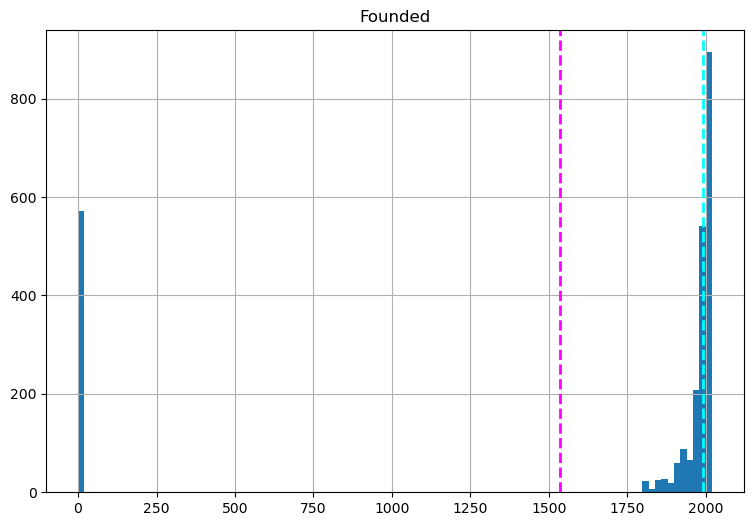

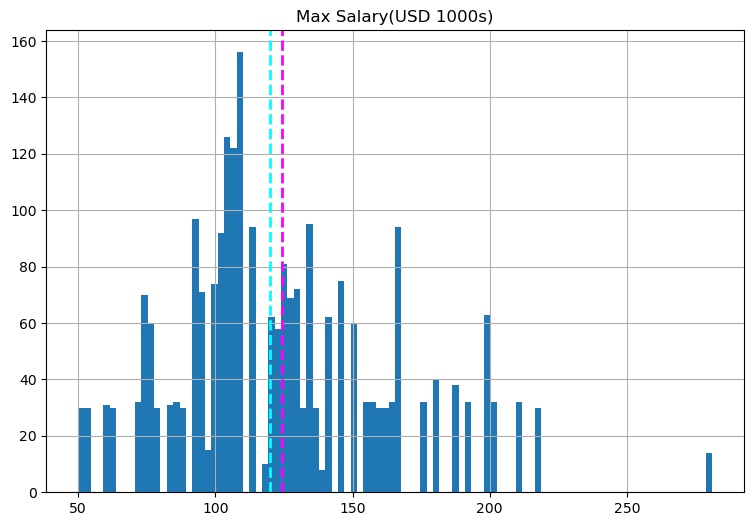

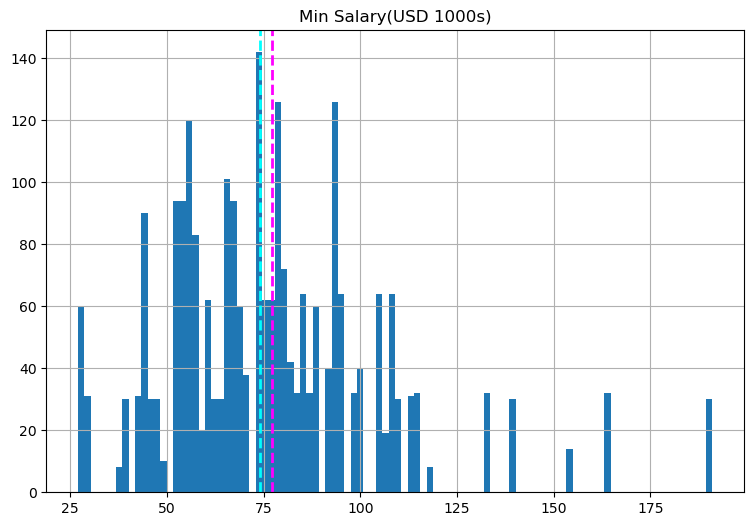

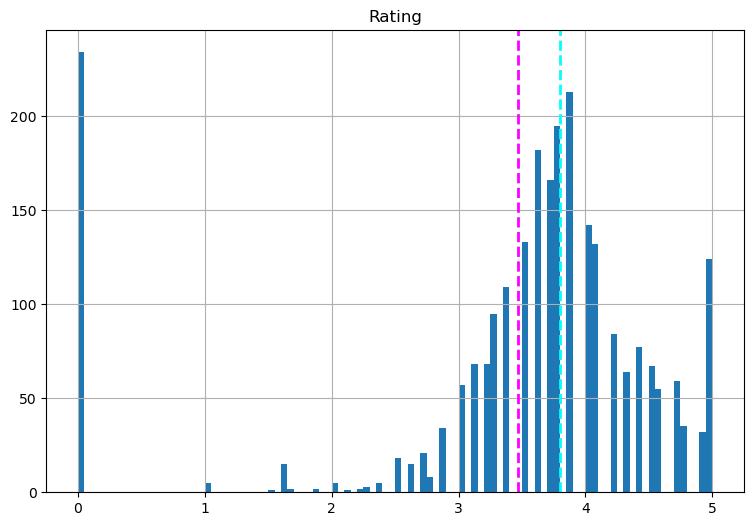

In [29]:
# creating plots for numeric features
numeric_features =["Founded","Max Salary(USD 1000s)","Min Salary(USD 1000s)","Rating"]

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = d[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

- **Most companies were founded in the 2000s**
- **Mean and Median Min Salary is about 75000**
- **Mean and Median Max Salary is between 100 and 150K**

In [30]:
d['Max Salary(USD 1000s)'].value_counts()

104.0    96
113.0    94
130.0    72
92.0     67
135.0    64
         ..
98.0     10
117.0    10
138.0     8
187.0     8
97.0      5
Name: Max Salary(USD 1000s), Length: 69, dtype: int64

In [31]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Sector                 2153 non-null   category
 1   Competitors            779 non-null    object  
 2   Revenue(USD Millions)  2528 non-null   category
 3   Easy Apply             2528 non-null   category
 4   Industry               2150 non-null   object  
 5   Job Title              2528 non-null   object  
 6   Job Description        2528 non-null   object  
 7   Founded                2528 non-null   int64   
 8   Headquarters           2404 non-null   object  
 9   Type of ownership      2528 non-null   category
 10  Size                   2409 non-null   category
 11  Rating                 2528 non-null   float64 
 12  Location               2528 non-null   object  
 13  Min Salary(USD 1000s)  2528 non-null   float64 
 14  Max Salary(USD 1000s)  2528 non-null   f

In [32]:
categorical_features=['Sector',
 'Revenue(USD Millions)',
 'Easy Apply',
 'Type of ownership',
 'Size',
 'Rating',
 ]

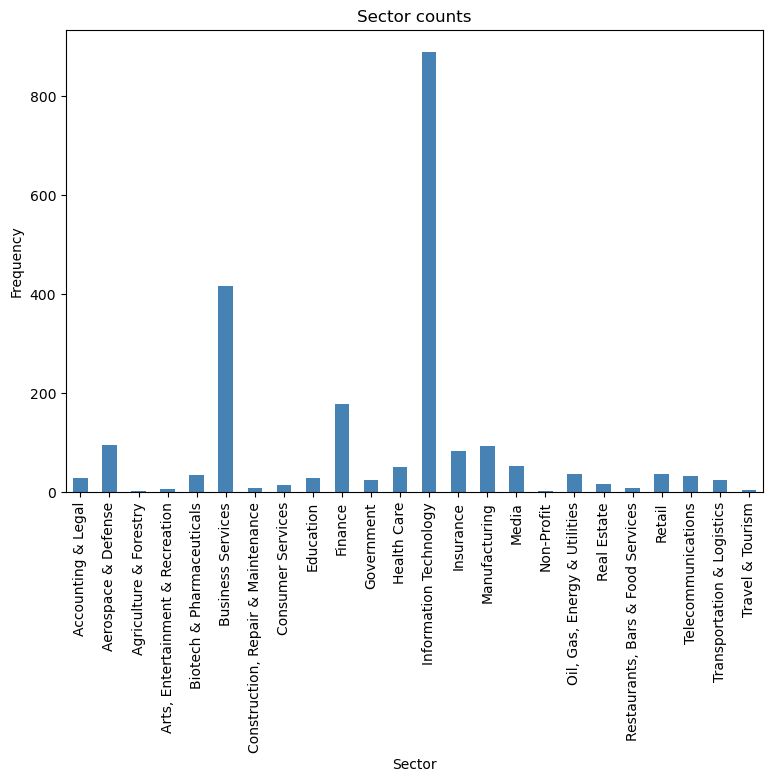

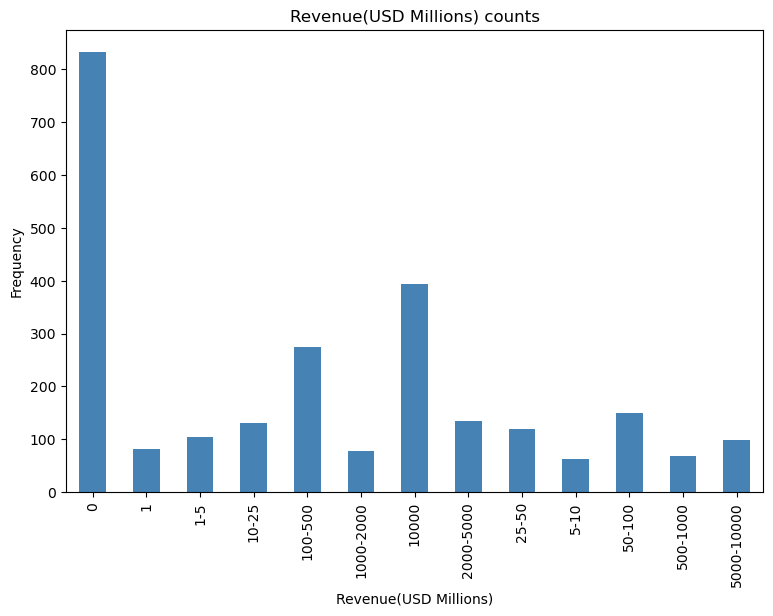

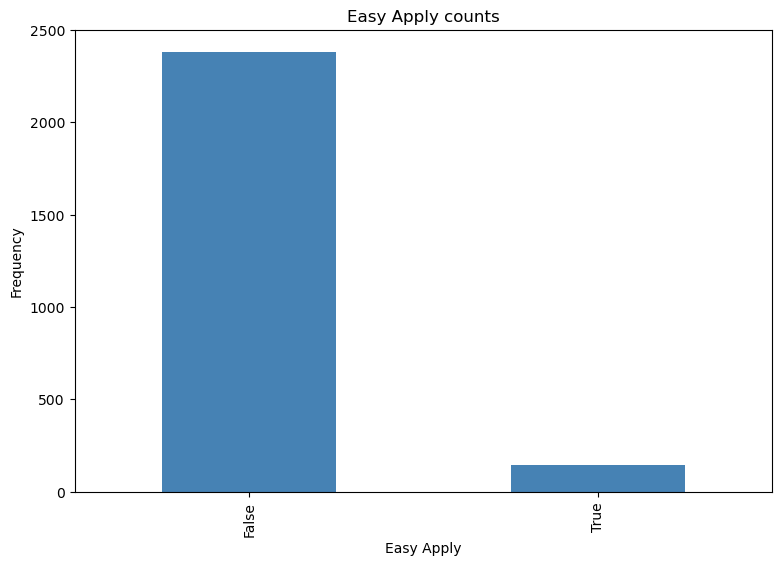

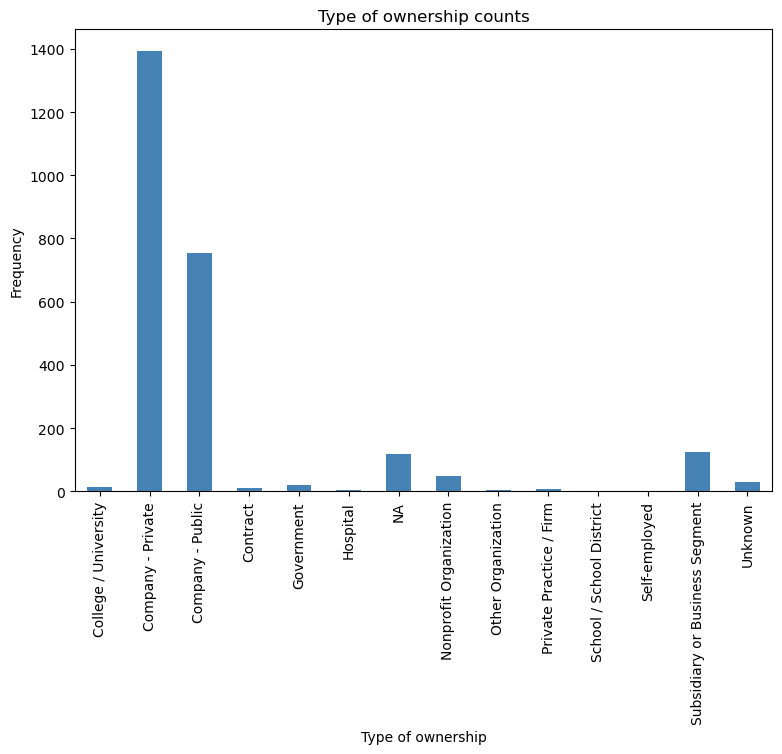

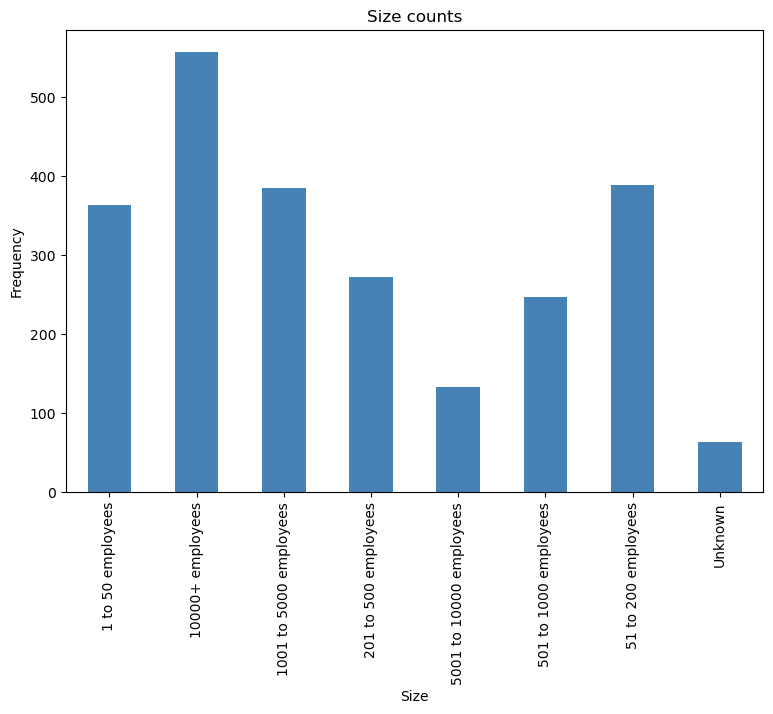

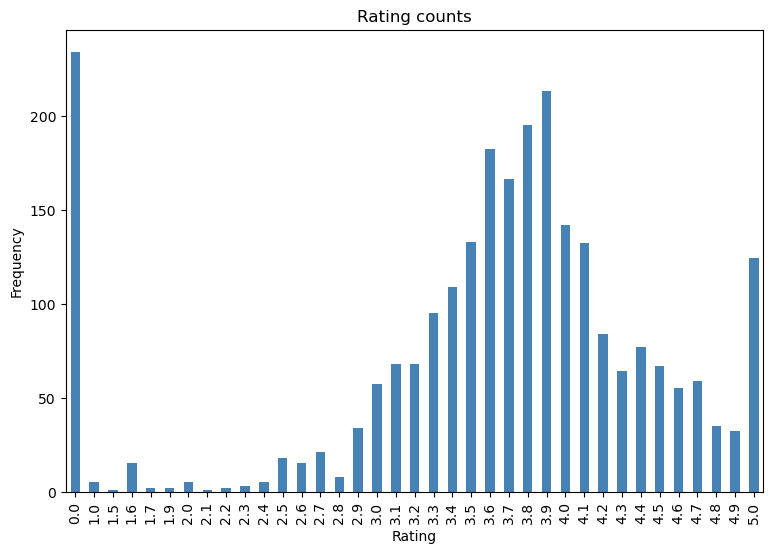

In [33]:
# creating plots for categorical features

for col in categorical_features:
    
    counts = d[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

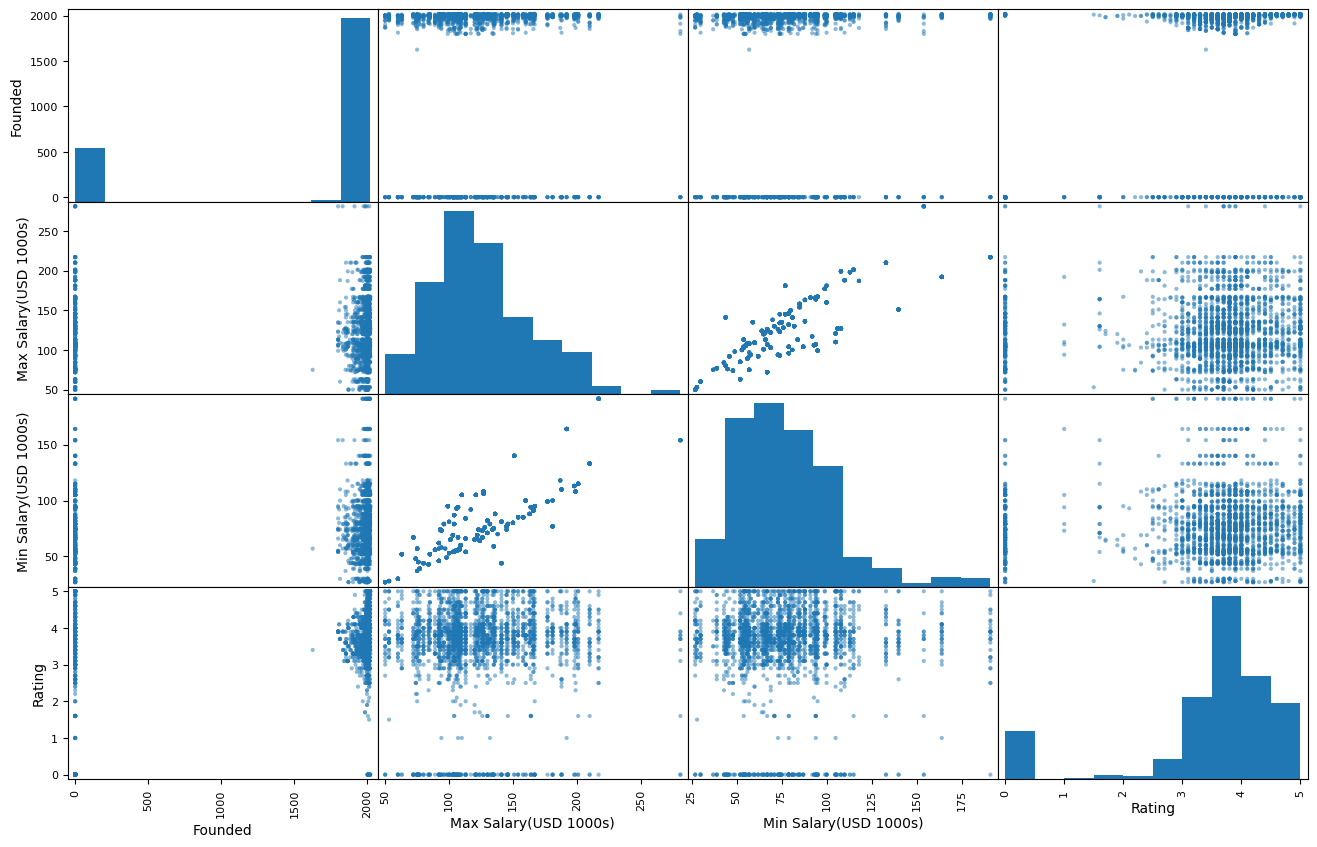

In [34]:
# looking at the correlation between numerical features using scatter plot

scatter_matrix(d[numeric_features], figsize=(16, 10))
plt.show()

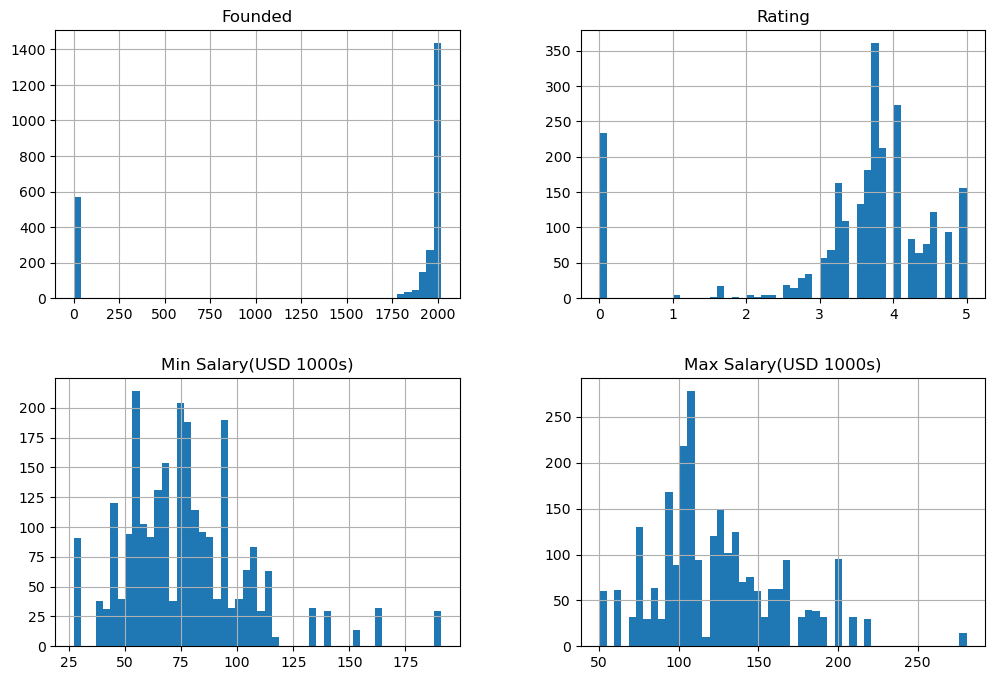

In [35]:
d.hist(bins=50, figsize=(12, 8))
plt.show()

In [36]:
# creating a chart comparing Revenue, Max and Min Salaries

scatter_fig = Max.plot_bokeh.scatter(x=Max.index, y="Max Salary(USD 1000s)" ,vertical_xlabel=True)


Surprisingly the companies with the highest revenue didn't pay the most salaries. Instead it was the companies with revenue between 10-25 million and 5billion and 10 billion

In [37]:
# creating a bar chart comparing Revenue to Maximum Salary
bar_chart = Max.plot_bokeh.bar(x=Max.index, y="Max Salary(USD 1000s)", legend=False,
                                       title="Average" , vertical_xlabel=True)

In [38]:
# Seeing the overlap between Max and Min Salary using a histogram
histogram = d.plot_bokeh.hist(y=["Max Salary(USD 1000s)", "Min Salary(USD 1000s)"],
                                    bins=30, histogram_type="sidebyside",
                                    vertical_xlabel=True,)

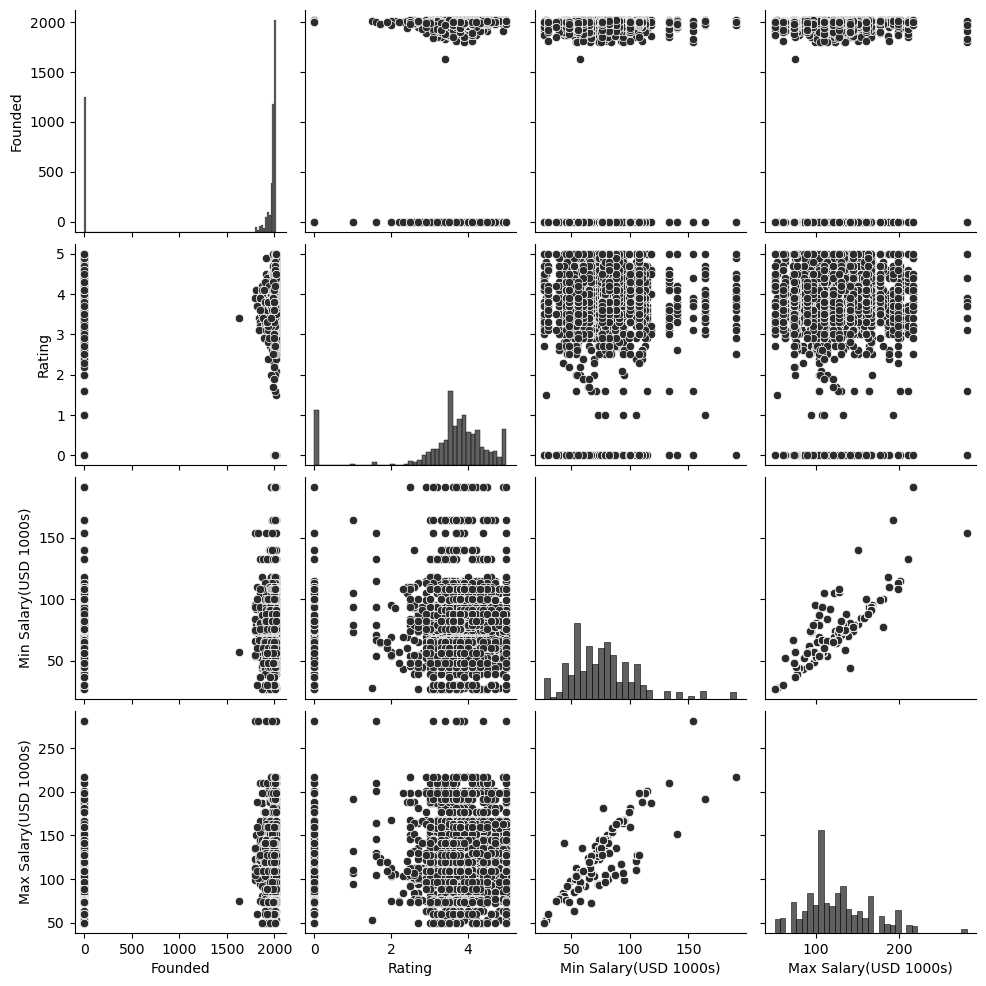

In [39]:
# checking correlation using seaborn
sns.set_palette('Greys_r')
sns.pairplot(d)
plt.show()

##### Checking if Rating can be a categorical value

In [40]:
d["Rating"].unique()

array([4.5, 3.4, 5. , 4.8, 3.7, 3. , 4.2, 4.3, 4.4, 4. , 3.9, 3.5, 3.8,
       3.3, 4.1, 4.9, 4.7, 3.6, 2.5, 3.1, 2.9, 0. , 2.7, 1. , 3.2, 2.6,
       2.8, 4.6, 2.2, 2. , 2.4, 1.6, 2.1, 2.3, 1.5, 1.7, 1.9])

In [41]:
d["Rating"].value_counts()

0.0    234
3.9    213
3.8    195
3.6    182
3.7    166
4.0    142
3.5    133
4.1    132
5.0    124
3.4    109
3.3     95
4.2     84
4.4     77
3.1     68
3.2     68
4.5     67
4.3     64
4.7     59
3.0     57
4.6     55
4.8     35
2.9     34
4.9     32
2.7     21
2.5     18
2.6     15
1.6     15
2.8      8
1.0      5
2.0      5
2.4      5
2.3      3
2.2      2
1.7      2
1.9      2
2.1      1
1.5      1
Name: Rating, dtype: int64

In [42]:
d[["Rating"]].value_counts()

Rating
0.0       234
3.9       213
3.8       195
3.6       182
3.7       166
4.0       142
3.5       133
4.1       132
5.0       124
3.4       109
3.3        95
4.2        84
4.4        77
3.2        68
3.1        68
4.5        67
4.3        64
4.7        59
3.0        57
4.6        55
4.8        35
2.9        34
4.9        32
2.7        21
2.5        18
2.6        15
1.6        15
2.8         8
2.0         5
2.4         5
1.0         5
2.3         3
1.7         2
1.9         2
2.2         2
1.5         1
2.1         1
dtype: int64

In [43]:
corr_matrix=d.corr()

C:\Users\ACER\AppData\Local\Temp\ipykernel_19220\2518312504.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [44]:
#checking correlation for Max Salary(USD 1000s)
corr_matrix["Max Salary(USD 1000s)"].sort_values(ascending=False)

Max Salary(USD 1000s)    1.000000
Min Salary(USD 1000s)    0.794309
Rating                   0.042985
Founded                  0.033878
Name: Max Salary(USD 1000s), dtype: float64

- Min Salary is the only variable that has a strong correlation with Maximum Salary. That will be our independent variable.

In [45]:
# Establishing dependent and independent variables
A=d["Min Salary(USD 1000s)"]
y=d["Max Salary(USD 1000s)"]

In [46]:
# Making data ready for training and testing
A=A.values
X=A.reshape((-1,1))

In [47]:
lower=pd.DataFrame(A)

In [48]:
pd.concat([lower,y],axis=1)

0  Max Salary(USD 1000s)
0     80.0                  150.0
1     80.0                  150.0
2     80.0                  150.0
3     80.0                  150.0
4     80.0                  150.0
...    ...                    ...
2523  76.0                  128.0
2524  76.0                  128.0
2525  76.0                  128.0
2526  76.0                  128.0
2527  76.0                  128.0

[2528 rows x 2 columns]

In [49]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
lr.predict(X_test)

array([121.10394421, 115.6127594 , 140.87220952,  99.13920498,
       117.80923333, 155.14929002, 129.88983991,  87.0585984 ,
        88.15683537, 136.47926167, 249.59766872, 105.72862675,
       113.41628548, 163.93518571, 110.1215746 , 144.16692041,
       102.43391587, 139.77397256,  92.54978321, 141.97044648,
       155.14929002, 102.43391587, 102.43391587, 193.58758368,
       144.16692041, 120.00570725,  96.94273106, 129.88983991,
       149.65810521, 139.77397256,  99.13920498,  96.94273106,
        99.13920498, 120.00570725, 133.18455079, 141.97044648,
       133.18455079, 113.41628548, 120.00570725, 111.21981156,
        90.35330929, 143.06868344, 112.31804852, 111.21981156,
       135.38102471,  88.15683537, 113.41628548, 158.44400091,
        99.13920498, 126.59512902,  70.58504398,  72.7815179 ,
       149.65810521, 121.10394421, 111.21981156, 121.10394421,
        80.46917663, 144.16692041, 121.10394421,  96.94273106,
        89.25507233, 112.31804852, 120.00570725, 100.23

In [53]:

print("lr.coef_: {}\n".format(lr.coef_))

print("lr.intercept_: {}\n".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [1.09823696]

lr.intercept_: 39.83440905598451

Training set score: 0.63
Test set score: 0.64


In linear regression, coefficients are the values that multiply the predictor values. Suppose you have the following regression equation: y = 3X + 5. In this equation, +3 is the coefficient, X is the predictor, and +5 is the constant.

In [54]:
y_pred = lr.predict(X_test)

In [55]:
model = LinearRegression().fit(X, y)

In [56]:
intercept = model.intercept_
coeff = model.coef_

##### Checking predictions and accuracy of model

In [57]:
predictions = model.predict(X_test)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [121. 115. 141.  99. 118. 155. 130.  87.  88. 136.]
Actual labels   :  1752    134.0
748     103.0
194     117.0
1099    104.0
1178    130.0
170     121.0
2180    130.0
647      84.0
1286     80.0
2024    163.0
Name: Max Salary(USD 1000s), dtype: float64


##### Checking mean squared error .ie. how accurate are predictions are based on the model.

- Closer it is to zero the more accurate it is

In [58]:
mse = mean_squared_error(y_test,y_pred)

In [59]:
mse

560.2405226652378

In [60]:
y_test

1752    134.0
748     103.0
194     117.0
1099    104.0
1178    130.0
        ...  
1546    217.0
76      154.0
432     158.0
1124    104.0
1387    135.0
Name: Max Salary(USD 1000s), Length: 506, dtype: float64

In [61]:
y_pred

array([121.10394421, 115.6127594 , 140.87220952,  99.13920498,
       117.80923333, 155.14929002, 129.88983991,  87.0585984 ,
        88.15683537, 136.47926167, 249.59766872, 105.72862675,
       113.41628548, 163.93518571, 110.1215746 , 144.16692041,
       102.43391587, 139.77397256,  92.54978321, 141.97044648,
       155.14929002, 102.43391587, 102.43391587, 193.58758368,
       144.16692041, 120.00570725,  96.94273106, 129.88983991,
       149.65810521, 139.77397256,  99.13920498,  96.94273106,
        99.13920498, 120.00570725, 133.18455079, 141.97044648,
       133.18455079, 113.41628548, 120.00570725, 111.21981156,
        90.35330929, 143.06868344, 112.31804852, 111.21981156,
       135.38102471,  88.15683537, 113.41628548, 158.44400091,
        99.13920498, 126.59512902,  70.58504398,  72.7815179 ,
       149.65810521, 121.10394421, 111.21981156, 121.10394421,
        80.46917663, 144.16692041, 121.10394421,  96.94273106,
        89.25507233, 112.31804852, 120.00570725, 100.23

- #### Visualize model prediction

In [62]:
predictions = model.predict(X_test)


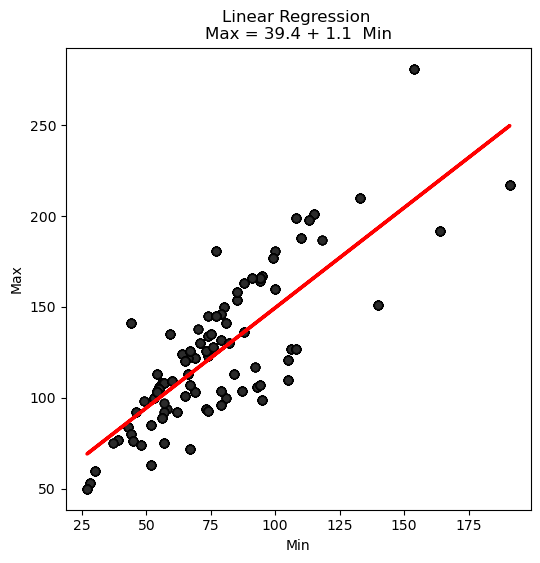

In [63]:
fig, ax = plt.subplots(figsize = (6, 6))

ax.scatter(X, y, alpha=0.7, edgecolors="k")

ax.plot(X, intercept + coeff * X, color="r", lw=2.5);
plt.xlabel("Min")
plt.ylabel("Max")
plt.title("Linear Regression \nMax = " + str(round(intercept,1)) + " + " + str(round(coeff[0],2)) + "  Min");

##### Visualize np.polyfit 

- Np.polyfit minimizes the squared error

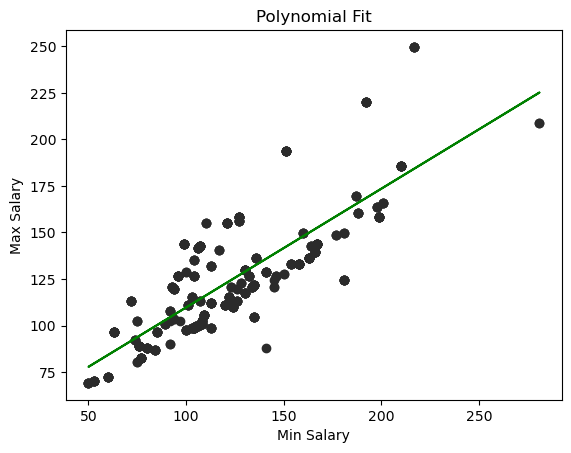

In [65]:
plt.scatter(y_test, predictions)

plt.xlabel('Min Salary')
plt.ylabel('Max Salary')
plt.title('Polynomial Fit')

# plot the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='green');


You can quantify the residuals by calculating a number of commonly used evaluation metrics. We'll focus on the following three:

*Mean Square Error (MSE)*: The mean of the squared differences between predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model

*Root Mean Square Error (RMSE)*: The square root of the MSE. This yields an absolute metric in the same unit as the label. The smaller the value, the better the model

*Coefficient of Determination* (usually known as R-squared or R2): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.

In [66]:
# check accuracy and pattern
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 559.7987800067261
RMSE: 23.660067202075442
R2: 0.6439563271595241


###### **R-Squared** aka as coefficient of determination is the correlation between x and y squared. 
Produces a value between 0 and 1 that measures the amount of variance that can be explained by the model. 
Generally, the closer this value is to 1, the better the model predicts.

The Root Mean Squared Error (RMSE) is one of the two main performance indicators for a regression model. It measures the average difference between values predicted by a model and the actual values. It provides an estimation of how well the model is able to predict the target value (accuracy)

In [67]:
#using logistic regression to predict Easy Apply 
y=d["Easy Apply"]
X=d.drop(columns=["Easy Apply"])


In [68]:
#Bring in categorical features
categorical_features_copy=categorical_features
categorical_features.remove("Easy Apply")

In [69]:
categorical_features

['Sector', 'Revenue(USD Millions)', 'Type of ownership', 'Size', 'Rating']

In [70]:
#Assigning categorical values to d_cat
d_cat=d[["Industry","Headquarters","Location","Sector","Size","company","Revenue(USD Millions)","Founded","Competitors"]]
d_cat.head()

Industry      Headquarters      Location  \
0                             Consulting       Chicago, IL  New York, NY   
1                            IT Services  Jacksonville, FL  New York, NY   
2                            IT Services       Trenton, NJ  New York, NY   
3  Investment Banking & Asset Management      New York, NY  New York, NY   
4                     Insurance Carriers      New York, NY  New York, NY   

                   Sector                   Size                  company  \
0       Business Services      1 to 50 employees                  Sagence   
1  Information Technology    51 to 200 employees   Enterprise Integration   
2  Information Technology    51 to 200 employees     Maestro Technologies   
3                 Finance  501 to 1000 employees              Jane Street   
4               Insurance   201 to 500 employees  GNY Insurance Companies   

  Revenue(USD Millions)  Founded                       Competitors  
0                 10-25     2009               WCI Consulting, PwC  
1                 25-50     1998                               NaN  
2                  5-10     2003                               NaN  
3                     0     2000                               NaN  
4               100-500     1914  Travelers, Chubb, Crum & Forster

In [71]:
#Attempting to encode categoricals
h=pd.DataFrame()
label_encoder = preprocessing.LabelEncoder()
for col in d_cat.columns:
    h[col]=label_encoder.fit_transform(d_cat[col])
        
# Encode Sector, competitors, Revenue, Industry, Headquarters, Location and Company
#printing to check
h.head()

Industry  Headquarters  Location  Sector  Size  company  \
0        17            99        71       5     0     1070   
1        42           192        71      12     6      445   
2        42           395        71      12     6      785   
3        47           270        71       9     5      689   
4        45           270        71      13     3      513   

   Revenue(USD Millions)  Founded  Competitors  
0                      3      125          313  
1                      8      114          330  
2                      9      119          330  
3                      0      116          330  
4                      4       42          305

In [72]:
# Assign X to h
X=h


In [73]:
# check X
X.head()

Industry  Headquarters  Location  Sector  Size  company  \
0        17            99        71       5     0     1070   
1        42           192        71      12     6      445   
2        42           395        71      12     6      785   
3        47           270        71       9     5      689   
4        45           270        71      13     3      513   

   Revenue(USD Millions)  Founded  Competitors  
0                      3      125          313  
1                      8      114          330  
2                      9      119          330  
3                      0      116          330  
4                      4       42          305

In [74]:
# check datatypes for columns in X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Industry               2528 non-null   int32
 1   Headquarters           2528 non-null   int32
 2   Location               2528 non-null   int32
 3   Sector                 2528 non-null   int32
 4   Size                   2528 non-null   int32
 5   company                2528 non-null   int32
 6   Revenue(USD Millions)  2528 non-null   int32
 7   Founded                2528 non-null   int64
 8   Competitors            2528 non-null   int32
dtypes: int32(8), int64(1)
memory usage: 98.9 KB


In [75]:
d["Easy Apply"].unique()

[False, True]
Categories (2, bool): [False, True]

In [76]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
model = LogisticRegression()

In [78]:
model.fit(X_train,y_train)

C:\Users\ACER\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [79]:
# checking accuracy for logistic regression
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9347826086956522


In [80]:
# using DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [81]:
# checking accuracy for DecisionTreeClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9387351778656127


In [82]:
# using Support Vector Machines

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
# checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9347826086956522


In [84]:
# using RandomForestClassifier model

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [85]:
# checking accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9565217391304348


In [86]:
rev_cat=d[["Industry","Headquarters","Location","Sector","Size","company","Easy Apply","Founded","Competitors"]]
y=d["Revenue(USD Millions)"]

In [87]:
#Attempting to encode categoricals
revenue=pd.DataFrame()
label_encoder = preprocessing.LabelEncoder()
for col in rev_cat.columns:
    revenue[col]=label_encoder.fit_transform(rev_cat[col])


In [88]:
        
# Encode Sector, competitors, Easy Apply, Industry, Headquarters, Location and Company
#printing to check
revenue.head()

# Assign X to h
X=revenue


# check X
X.head()

# check datatypes for columns in X
X.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Industry      2528 non-null   int32
 1   Headquarters  2528 non-null   int32
 2   Location      2528 non-null   int32
 3   Sector        2528 non-null   int32
 4   Size          2528 non-null   int32
 5   company       2528 non-null   int32
 6   Easy Apply    2528 non-null   int64
 7   Founded       2528 non-null   int64
 8   Competitors   2528 non-null   int32
dtypes: int32(7), int64(2)
memory usage: 108.8 KB


In [89]:

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train,y_train)

# checking accuracy for logistic regression
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# using DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# checking accuracy for DecisionTreeClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# using Support Vector Machines

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# using RandomForestClassifier model

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# checking accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

C:\Users\ACER\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: 0.3577075098814229
Accuracy: 0.7312252964426877
Accuracy: 0.3932806324110672
Accuracy: 0.7924901185770751


- ##### Minimum Salary is the only feature that can help predict maximum salaries. 


- ##### RandomForestClassifier helps us predicit "Revenue"  with 78% accuracy

- ##### RandomForestClassifier helps us predicit "Easy Apply" in Job postings with 95% accuracy